<font size = "+3"> Employee Retention Prediction by Deeplearning186

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the Data

In [94]:
employee_df = pd.read_csv("C:\Human_Resources.csv")

Looking at the data

In [95]:
pd.set_option('display.max_columns', None)

In [96]:
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [97]:
employee_df["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [98]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Replacing the Yes or No Values with Binary

In [99]:
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x:1 if x == "Yes" else 0)

In [100]:
employee_df["Over18"] = employee_df["Over18"].apply(lambda x:1 if x == "Y" else 0)

In [101]:
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x:1 if x == "Yes" else 0)

In [102]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


<font size = "+3"> Data Visualization


Check for missing Data using heating Map

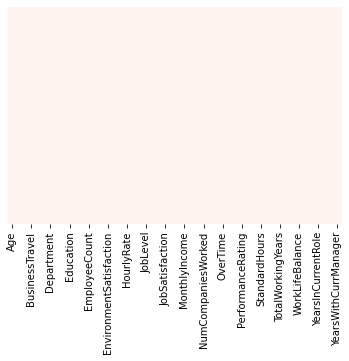

In [103]:
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = "Reds");

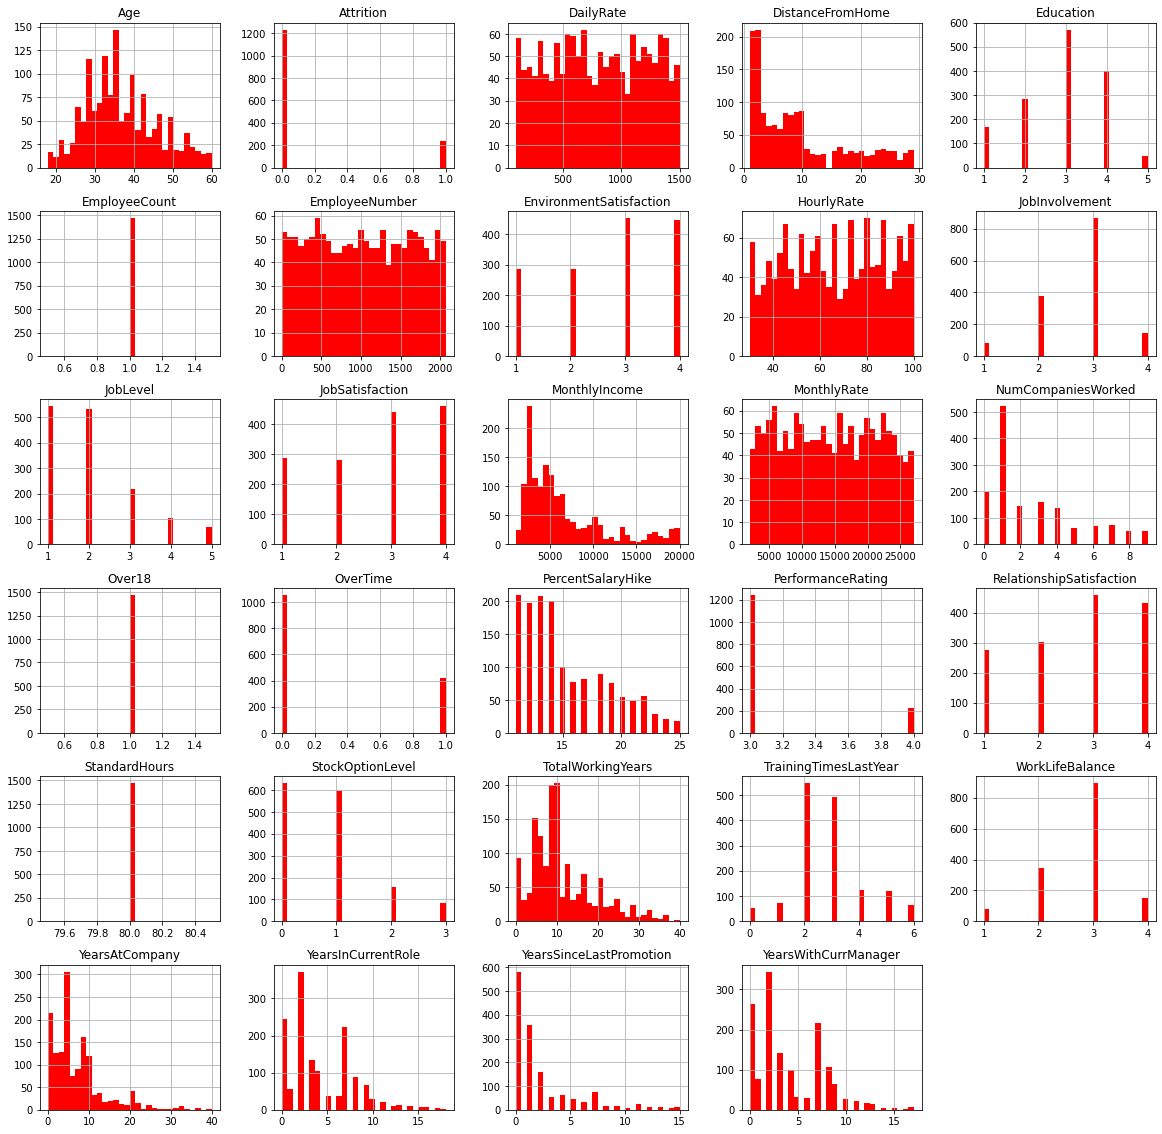

In [104]:
employee_df.hist(bins = 30, figsize = (20,20), color = "r");

In [105]:
employee_df.drop(["EmployeeCount","StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

In [106]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


<font size = "+3"> Let's see how many employees left the company! 

In [107]:
left_df   = employee_df[employee_df["Attrition"] == 1]
stayed_df = employee_df[employee_df["Attrition"] == 0]

In [108]:
print("The number of employees that left are : ", left_df.shape[0])
print("% of employees that left = ", left_df.shape[0]/employee_df.shape[0] * 100)

The number of employees that left are :  237
% of employees that left =  16.122448979591837


In [109]:
print("The number of employees that stayed are : ", stayed_df.shape[0])
print("% of employees that stayed = ", stayed_df.shape[0]/employee_df.shape[0] * 100)

The number of employees that stayed are :  1233
% of employees that stayed =  83.87755102040816


In [110]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [111]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<h1 style= font size: "1vw"> Useful findings about the employees that stayed vs left : </h1>


    * Mean age of employees that stayed is higher.
    * Daily rate of employees that stayed is higher.
    * Employees that stayed live closer to their homes.
    * Employees that stayed are generally more satisfied with their job.
    * Employees that stayed tend to have higher stock level. 

<AxesSubplot:>

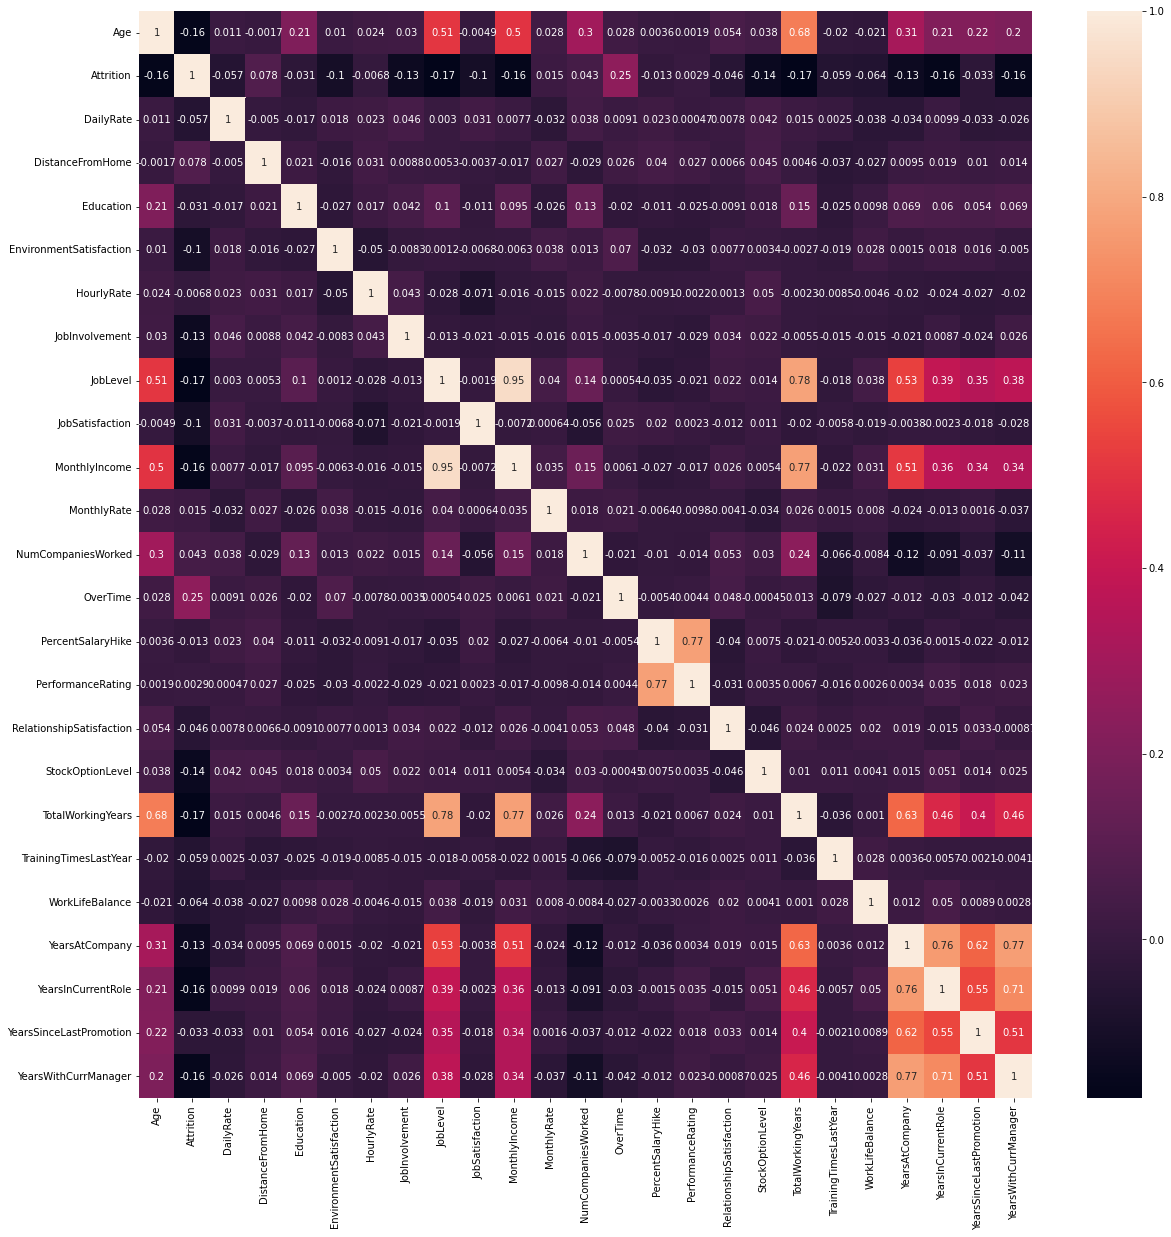

In [112]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

<h1 style= font size: "1vw"> Here are the findings from heatmap </h1>

* Job level is strongly correlated with total working hours.
* Monthly income is strongly correlated with Job level.
* Monthly income is strongly correlated with total working hours.
* Age is stongly correlated with monthly income

<AxesSubplot:xlabel='Age', ylabel='count'>

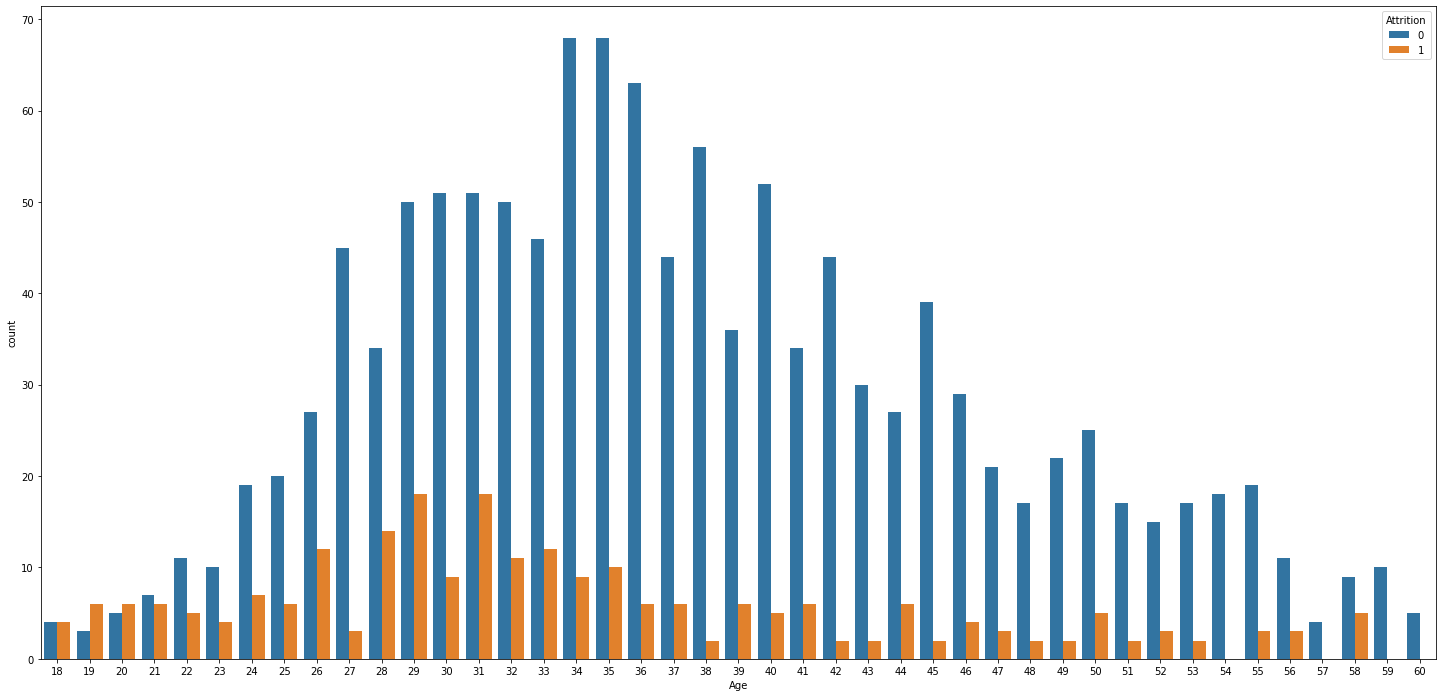

In [113]:
plt.figure(figsize = [25, 12])
sns.countplot(x = "Age", hue = "Attrition", data = employee_df)

* Single employees tend to leave compared to married and divorced
* Sales Representitives tend to leave compared to any other job 
* Less involved employees tend to leave the company 
* Less experienced (low job level) tend to leave the company 

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

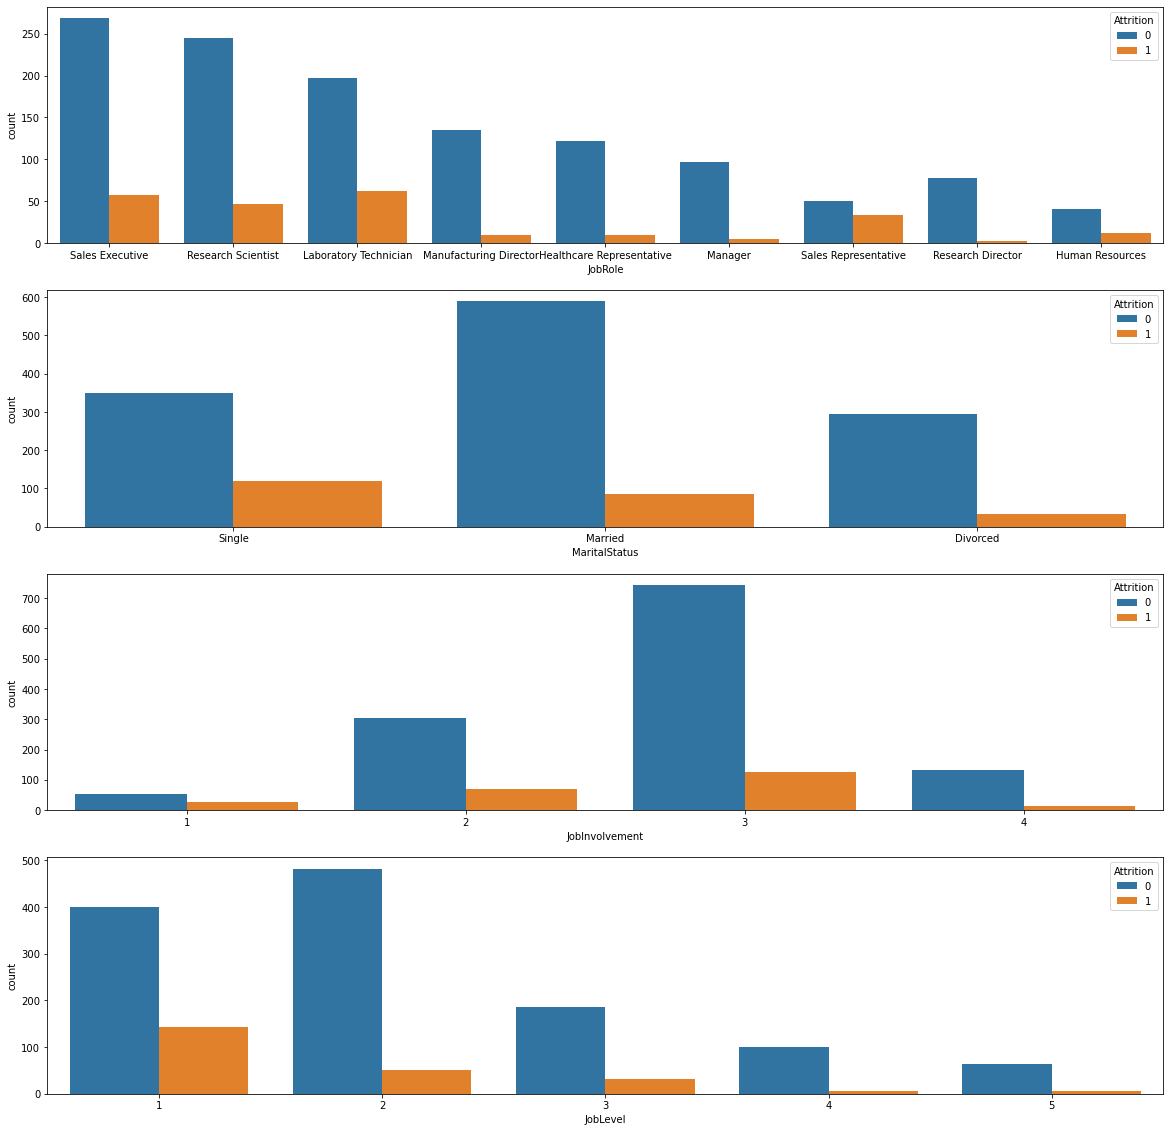

In [114]:
plt.figure(figsize= [20,20])

plt.subplot(411)
sns.countplot(x = "JobRole", hue = "Attrition", data = employee_df)

plt.subplot(412)
sns.countplot(x = "MaritalStatus", hue = "Attrition", data = employee_df)

plt.subplot(413)
sns.countplot(x = "JobInvolvement", hue = "Attrition", data = employee_df)

plt.subplot(414)
sns.countplot(x = "JobLevel", hue = "Attrition", data = employee_df)


Text(0.5, 0, 'Distance From Home')

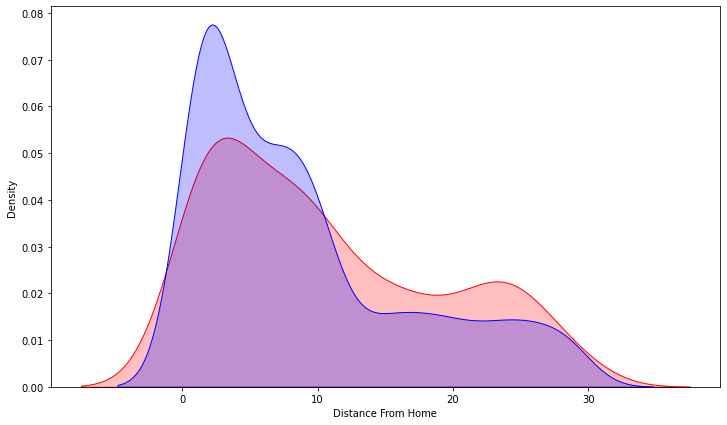

In [115]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df["DistanceFromHome"], label = "Employees Who Left", fill = True, color = "r")
sns.kdeplot(stayed_df["DistanceFromHome"], label = "Employees Who stayed", fill = True, color = "b")

plt.xlabel("Distance From Home")

Text(0.5, 0, 'Years with current manager')

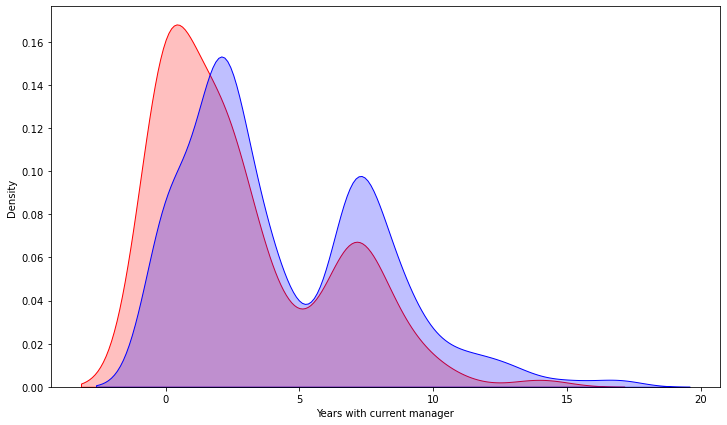

In [116]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df["YearsWithCurrManager"], label = "Employees Who Left", fill = True, color = "r")
sns.kdeplot(stayed_df["YearsWithCurrManager"], label = "Employees Who stayed", fill = True, color = "b")

plt.xlabel("Years with current manager")

Text(0.5, 0, 'Total Working Years')

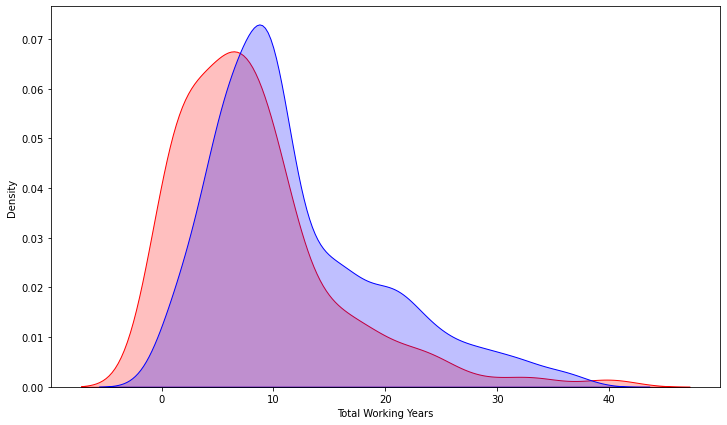

In [117]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df["TotalWorkingYears"], label = "Employees Who Left", fill = True, color = "r")
sns.kdeplot(stayed_df["TotalWorkingYears"], label = "Employees Who stayed", fill = True, color = "b")

plt.xlabel("Total Working Years")

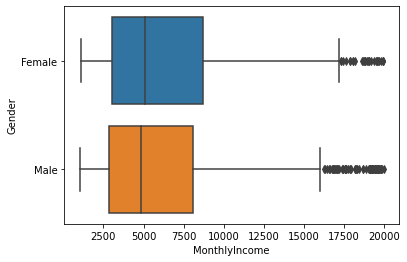

In [118]:
sns.boxplot(x = "MonthlyIncome", y = "Gender", data = employee_df);

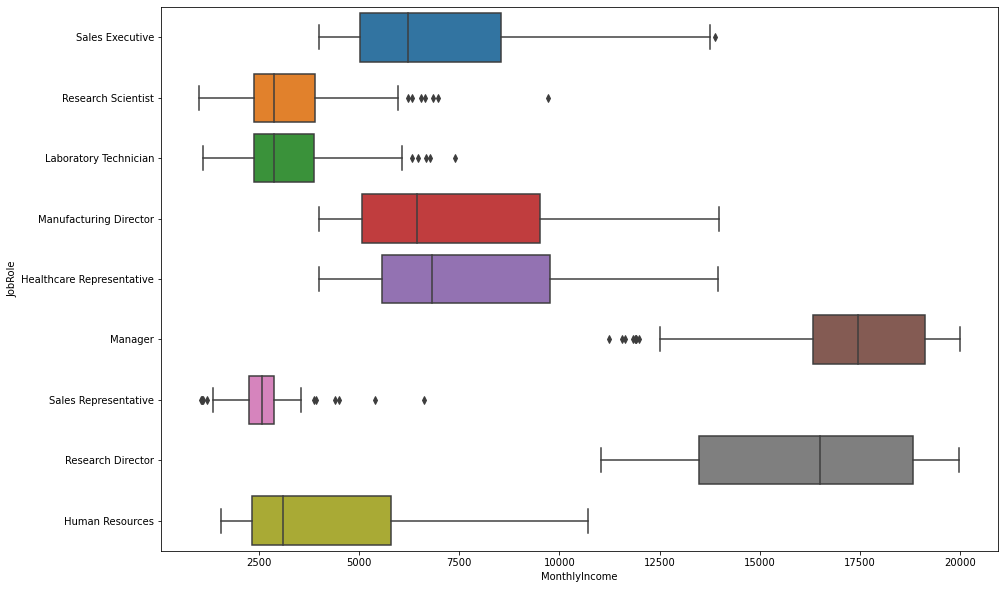

In [119]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = "MonthlyIncome", y = "JobRole", data = employee_df);

<font size = "+3"> Creating testing and training data set and performing data cleaning.

In [120]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [121]:
X_cat = employee_df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]

In [122]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [123]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [124]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [125]:
X_cat.shape

(1470, 26)

In [126]:
X_cat = pd.DataFrame(X_cat)

In [127]:
X_cat.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
X_numerical = employee_df[['Age','DailyRate','DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [129]:
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [138]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [139]:
X_all.columns = X_all.columns.astype(str)

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)


In [141]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
Y = employee_df["A"]